In [1]:
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy.table import Table
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
import astropy.constants as const

from regions import CirclePixelRegion, CircleSkyRegion, PixCoord

from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=70., Om0=0.3)

In [2]:
def calc_Noverg(line_flux, line_name):
    line_dict = {'H2_10_S2':[3.98e-7, 2.0338, 7584], 'H2_10_S1':[3.47e-7, 2.1218, 6956],
                'H2_10_S0':[2.53e-7, 2.2235, 6471], 'H2_21_S1':[4.98e-7, 2.2477, 12550],
                'H2_21_S2':[5.60e-7, 2.1542, 13150]}
    
    line_A, line_wave, Eupper = line_dict[line_name]
    Noverg = 4*np.pi*(line_wave*u.micron)/(const.h * const.c) * (line_flux*u.erg/u.s/(u.cm**2)) / (line_A/u.s)
    
    Noverg = Noverg.decompose().to(u.cm**-2)
    
    return Noverg, Eupper

In [3]:
nifs_fl = fits.open('/Users/jotter/highres_PSBs/ngc1266_NIFS/fit_output/run8_gaussfit_maps.fits')

nifs_maps = nifs_fl[0].data
nifs_header = nifs_fl[0].header
nifs_wcs = WCS(nifs_header).celestial
nifs_fl.close()

H2_10_S2_flux = nifs_maps[4,:,:] * 1e-8
H2_10_S2_mask = nifs_maps[6,:,:]
H2_10_S2_bool = np.where(H2_10_S2_mask == 1, True, False)

H2_10_S1_flux = nifs_maps[7,:,:] * 1e-8
H2_10_S1_flux_err = nifs_maps[8,:,:] * 1e-8
H2_10_S1_mask = nifs_maps[9,:,:]
H2_10_S1_bool = np.where(H2_10_S1_mask == 1, True, False)

H2_10_S0_flux = nifs_maps[10,:,:] * 1e-8
H2_10_S0_mask = nifs_maps[12,:,:]
H2_10_S0_bool = np.where(H2_10_S0_mask == 1, True, False)

H2_21_S1_flux = nifs_maps[13,:,:] * 1e-8
H2_21_S1_mask = nifs_maps[15,:,:]
H2_21_S1_bool = np.where(H2_21_S1_mask == 1, True, False)

H2_21_S2_flux = nifs_maps[16,:,:] * 1e-8
H2_21_S2_mask = nifs_maps[18,:,:]
H2_21_S2_bool = np.where(H2_21_S2_mask == 1, True, False)

brgamma_flux = nifs_maps[19,:,:] * 1e-8
brgamma_mask = nifs_maps[21,:,:]
brgamma_bool = np.where(brgamma_mask == 1, True, False)

map_shape = H2_10_S2_flux.shape

#print(nifs_header)

In [4]:
z = 0.007214

D_L = cosmo.luminosity_distance(z).to(u.Mpc)
as_per_kpc = cosmo.arcsec_per_kpc_comoving(z)

as_in_125pc = 0.125 * as_per_kpc.value

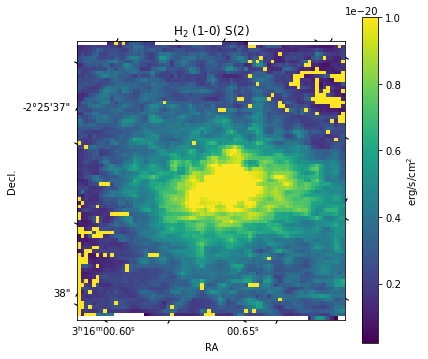

In [5]:
fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)
mappable = ax0.imshow(H2_10_S2_flux, vmax=1e-20)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'H$_2$ (1-0) S(2)')

plt.colorbar(mappable, label=r'erg/s/cm$^2$')

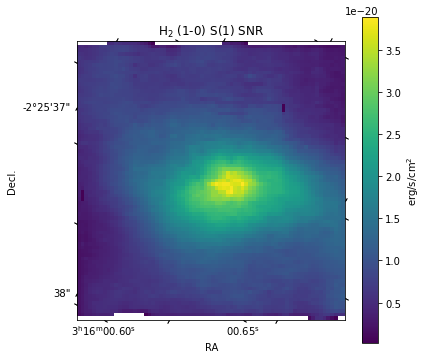

In [6]:
fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)
mappable = ax0.imshow(H2_10_S1_flux)#, vmax=3, vmin=0)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'H$_2$ (1-0) S(1) SNR')

plt.colorbar(mappable, label=r'erg/s/cm$^2$')

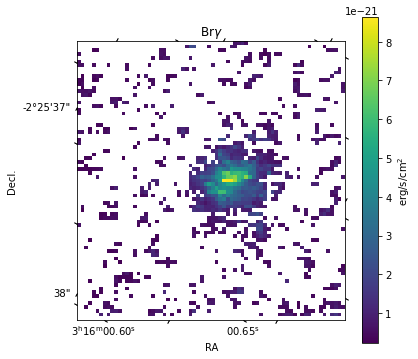

In [5]:
fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)


brgamma_masked = brgamma_flux
brgamma_masked[np.logical_not(brgamma_bool)] = np.nan
mappable = ax0.imshow(brgamma_flux)#, vmax=1e-19)#, vmin=5)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'Br$\gamma$')

plt.colorbar(mappable, label=r'erg/s/cm$^2$')

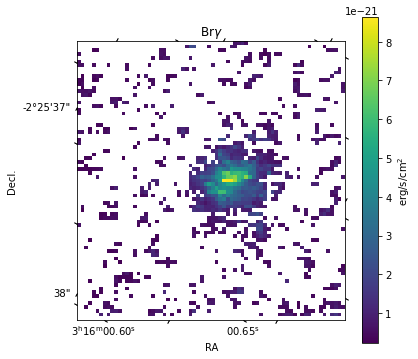

In [8]:
fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)


brgamma_masked = brgamma_flux
brgamma_masked[np.logical_not(brgamma_bool)] = np.nan
mappable = ax0.imshow(brgamma_masked)#, vmax=1e-19)#, vmin=5)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'Br$\gamma$')

plt.colorbar(mappable, label=r'erg/s/cm$^2$')

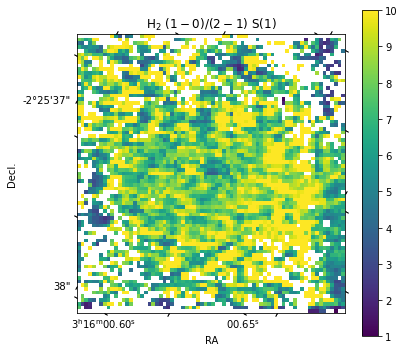

In [9]:
S1_ratio = H2_10_S1_flux/H2_21_S1_flux

fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)
mappable = ax0.imshow(S1_ratio, vmax=10, vmin=1)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'H$_2$ $(1-0)/(2-1)$ S(1)')

plt.colorbar(mappable)

#plt.savefig('plots/H2_S1_ratio_plot.png', dpi=300)

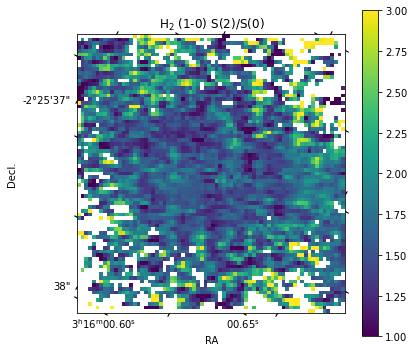

In [10]:
S20_ratio = H2_10_S2_flux/H2_10_S0_flux

fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)
mappable = ax0.imshow(S20_ratio, vmax=3, vmin=1)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'H$_2$ (1-0) S(2)/S(0)')

plt.colorbar(mappable)

#plt.savefig('plots/H2_10_ratio_plot.png', dpi=300)

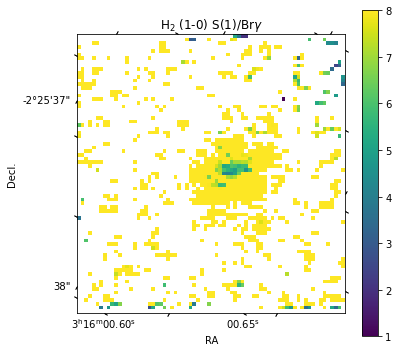

In [6]:
H2br_ratio = H2_10_S1_flux/brgamma_flux

fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)
mappable = ax0.imshow(H2br_ratio, vmax=8, vmin=1)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'H$_2$ (1-0) S(1)/Br$\gamma$')

plt.colorbar(mappable)

#plt.savefig('plots/H2_10_ratio_plot.png', dpi=300)

In [8]:
U19 = ascii.read('/Users/jotter/highres_PSBs/tables/U19_tab2.txt')
U19

Galaxy_Name^a,H2_1-0_S(1)_Flux,e_H2_1-0_S(1)_Flux,1-0_S(3)/1-0_S(1),e_1-0_S(3)/1-0_S(1),1-0_S(2)/1-0_S(1),e_1-0_S(2)/1-0_S(1),1-0_S(0)/1-0_S(1),e_1-0_S(0)/1-0_S(1),2-1_S(1)/1-0_S(1),e_2-1_S(1)/1-0_S(1),Brgamma_Flux,e_Brgamma_Flux,Brdelta/Brgamma,e_Brdelta/Brgamma
str26,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
UGC_08058_(35_mas),0.18,0.07,0.92,0.03,0.48,0.03,0.32,0.95,0.17,0.03,0.14,0.01,0.07,0.47
IRAS_F17207-0014,0.48,0.01,0.92,-1.0,0.48,-1.0,0.25,0.01,0.18,0.01,0.3,0.01,0.09,0.09
UGC_08696,1.01,0.01,1.04,0.01,0.38,0.01,0.27,0.01,0.16,0.01,0.46,0.27,0.16,0.07
IRAS_F22941-1808,0.17,0.91,0.75,0.08,0.31,0.22,0.0,-1.0,0.0,-1.0,0.15,0.78,0.04,1.49
IRAS_F15250+3608_(50_mas),0.1,-1.0,0.85,0.03,0.35,0.02,0.0,-1.0,0.0,-1.0,0.11,0.06,0.07,-1.0
UGC_05101,0.52,0.01,1.18,0.04,0.39,0.02,0.36,0.01,0.22,0.01,0.29,0.02,0.09,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NGC_7469N_(35_mas),0.02,-1.0,0.92,0.04,0.49,0.03,0.27,0.02,0.55,0.04,0.02,-1.0,0.02,-1.0
NGC_6090,0.1,0.01,0.9,0.07,0.36,0.04,0.51,0.05,0.3,0.05,0.12,0.01,0.05,0.05


In [9]:
center_pix = PixCoord(map_shape[0]/2, map_shape[1]/2)
aperture_radius = 0.3*u.arcsecond
aperture_radius_pix = (aperture_radius / (nifs_header['CDELT1']*u.degree)).decompose()

ap = CirclePixelRegion(center=center_pix, radius=aperture_radius_pix.value)
ap_mask = ap.to_mask()
mask_img = ap_mask.to_image(map_shape)

H2_10_S2_flux_ctr = np.nansum(mask_img * H2_10_S2_flux)
H2_10_S1_flux_ctr = np.nansum(mask_img * H2_10_S1_flux)
H2_10_S0_flux_ctr = np.nansum(mask_img * H2_10_S0_flux)
H2_21_S1_flux_ctr = np.nansum(mask_img * H2_21_S1_flux)
H2_21_S2_flux_ctr = np.nansum(mask_img * H2_21_S2_flux)
brgamma_flux_ctr = np.nansum(mask_img * brgamma_flux)

aperture_radius2 = 1.5*u.arcsecond
aperture_radius_pix2 = (aperture_radius2 / (nifs_header['CDELT1']*u.degree)).decompose()

ap2 = CirclePixelRegion(center=center_pix, radius=aperture_radius_pix2.value)
ap_mask2 = ap2.to_mask()
mask_img2 = ap_mask2.to_image(map_shape)

mask_img_otr = np.logical_and(mask_img2, np.logical_not(mask_img))

H2_10_S2_flux_otr = np.nansum(mask_img_otr * H2_10_S2_flux)
H2_10_S1_flux_otr = np.nansum(mask_img_otr * H2_10_S1_flux)
H2_10_S0_flux_otr = np.nansum(mask_img_otr * H2_10_S0_flux)
H2_21_S1_flux_otr = np.nansum(mask_img_otr * H2_21_S1_flux)
H2_21_S2_flux_otr = np.nansum(mask_img_otr * H2_21_S2_flux)
brgamma_flux_otr = np.nansum(mask_img_otr * brgamma_flux)

ratio_21_10_otr = H2_21_S1_flux_otr/H2_10_S1_flux_otr
ratio_21_10_ctr = H2_21_S1_flux_ctr/H2_10_S1_flux_ctr

ratio_s2s0_otr = H2_10_S2_flux_otr/H2_10_S0_flux_otr
ratio_s2s0_ctr = H2_10_S2_flux_ctr/H2_10_S0_flux_ctr


/var/folders/vf/84glvj217td2j5kktzkvgpqr0000gn/T/ipykernel_29186/3289684264.py:16: RuntimeWarning: divide by zero encountered in true_divide
  ratio_s2s0 = ratio_s2s1/ratio_s0s1
/var/folders/vf/84glvj217td2j5kktzkvgpqr0000gn/T/ipykernel_29186/3289684264.py:17: RuntimeWarning: divide by zero encountered in true_divide
  e_ratio_s2s0 = ratio_s2s0 * np.sqrt((e_ratio_s2s1/ratio_s2s1)**2 + (e_ratio_s0s1/ratio_s0s1)**2)


Text(0.51, 2.2, 'Non-thermal')

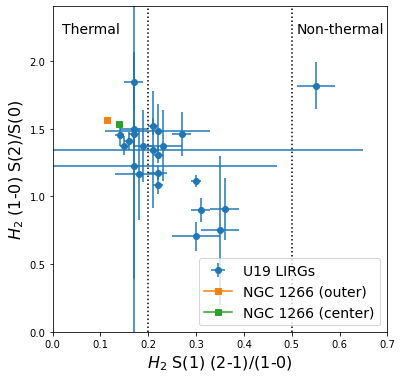

In [10]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111)

ratio_21_10 = U19['2-1_S(1)/1-0_S(1)']
e_ratio_21_10 = U19['e_2-1_S(1)/1-0_S(1)']

noulim_ind_21 = np.where(e_ratio_21_10 > 0)

ratio_s2s1 = U19['1-0_S(2)/1-0_S(1)']
e_ratio_s2s1 = U19['e_1-0_S(2)/1-0_S(1)']

ratio_s0s1 = U19['1-0_S(0)/1-0_S(1)']
e_ratio_s0s1 = U19['e_1-0_S(0)/1-0_S(1)']

ratio_s2s0 = ratio_s2s1/ratio_s0s1
e_ratio_s2s0 = ratio_s2s0 * np.sqrt((e_ratio_s2s1/ratio_s2s1)**2 + (e_ratio_s0s1/ratio_s0s1)**2)

noulim_ind_s2s1 = np.where(e_ratio_s2s1 > 0)
noulim_ind_s0s1 = np.where(e_ratio_s0s1 > 0)
noulim_ind_s2s0 = np.intersect1d(noulim_ind_s2s1, noulim_ind_s0s1)

noulim_ind = np.intersect1d(noulim_ind_21, noulim_ind_s2s0)

ax.errorbar(ratio_21_10[noulim_ind], ratio_s2s0[noulim_ind], xerr=e_ratio_21_10[noulim_ind], yerr=e_ratio_s2s0[noulim_ind],
            marker='o', linestyle='', label='U19 LIRGs')

ax.errorbar(ratio_21_10_otr, ratio_s2s0_otr, marker='s', label='NGC 1266 (outer)')
ax.errorbar(ratio_21_10_ctr, ratio_s2s0_ctr, marker='s', label='NGC 1266 (center)')

ax.set_xlabel(r'$H_2$ S(1) (2-1)/(1-0)', fontsize=16)
ax.set_ylabel(r'$H_2$ (1-0) S(2)/S(0)', fontsize=16)

plt.legend(fontsize=14, loc='lower right')

ax.set_xlim(0,0.7)
ax.set_ylim(0,2.4)

ax.axvline(0.2, linestyle='dotted', color='k')
ax.axvline(0.5, linestyle='dotted', color='k')

ax.text(0.02, 2.2, 'Thermal', fontsize=14)
ax.text(0.51, 2.2, 'Non-thermal', fontsize=14)

/var/folders/vf/84glvj217td2j5kktzkvgpqr0000gn/T/ipykernel_29186/1094326082.py:1: RuntimeWarning: divide by zero encountered in true_divide
  Tvib = 5600/np.log(1.355 / ratio_21_10)


(500.0, 3000.0)

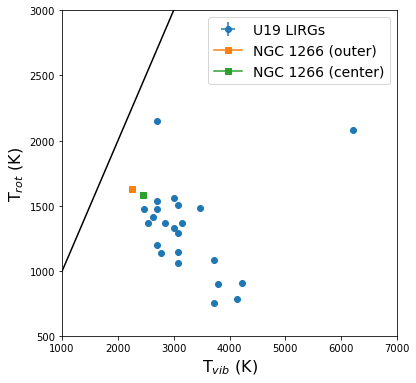

In [11]:
Tvib = 5600/np.log(1.355 / ratio_21_10)
Trot = -1113/np.log(0.323 * ratio_s2s0)

Tvib_ctr = 5600/np.log(1.355 / ratio_21_10_ctr)
Trot_ctr = -1113/np.log(0.323 * ratio_s2s0_ctr)
Tvib_otr = 5600/np.log(1.355 / ratio_21_10_otr)
Trot_otr = -1113/np.log(0.323 * ratio_s2s0_otr)

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111)

ax.errorbar(Tvib[noulim_ind], Trot[noulim_ind], xerr=0, yerr=0,
            marker='o', linestyle='', label='U19 LIRGs')

ax.errorbar(Tvib_otr, Trot_otr, marker='s', label='NGC 1266 (outer)')
ax.errorbar(Tvib_ctr, Trot_ctr, marker='s', label='NGC 1266 (center)')

ax.set_xlabel(r'T$_{vib}$ (K)', fontsize=16)
ax.set_ylabel(r'T$_{rot}$ (K)', fontsize=16)

plt.legend(fontsize=14, loc='upper right')

ax.plot([0,10000], [0,10000], marker='', linestyle='-', color='k')

ax.set_xlim(1000,7000)
ax.set_ylim(500,3000)

2.501590335659628 10.555795022191198


/var/folders/vf/84glvj217td2j5kktzkvgpqr0000gn/T/ipykernel_29186/3309937386.py:1: RuntimeWarning: invalid value encountered in true_divide
  H2_brgamma_lirgs = U19['H2_1-0_S(1)_Flux']/U19['Brgamma_Flux']


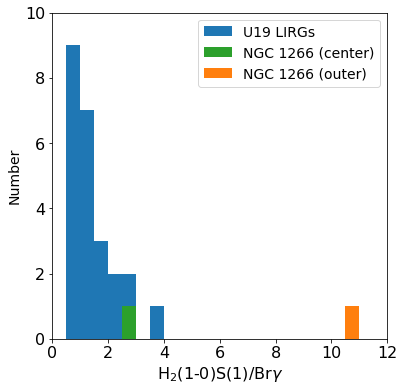

In [37]:
H2_brgamma_lirgs = U19['H2_1-0_S(1)_Flux']/U19['Brgamma_Flux']
H2_brgamma_ctr = H2_10_S0_flux_ctr/brgamma_flux_ctr
H2_brgamma_otr = H2_10_S0_flux_otr/brgamma_flux_otr

print(H2_brgamma_ctr, H2_brgamma_otr)

full_H2_brgamma = np.concatenate((H2_brgamma_lirgs, [H2_brgamma_ctr, H2_brgamma_otr]))
bins = np.arange(0,11.5,0.5)
full_H2_brgamma_hist, full_bins = np.histogram(full_H2_brgamma, bins)

fig = plt.figure(figsize=(6,6))

plt.bar(bins[0:-1], full_H2_brgamma_hist, align='edge', width=0.5, label='U19 LIRGs')


plt.bar([2.5], [1], align='edge', width=0.5, color='tab:green', label='NGC 1266 (center)')
plt.bar([10.5], [1], align='edge', width=0.5, color='tab:orange', label='NGC 1266 (outer)')

plt.ylabel('Number', fontsize=14)
plt.xlabel(r'H$_2$(1-0)S(1)/Br$\gamma$', fontsize=16)

plt.tick_params(labelsize=16)

plt.xlim(0,12)
plt.ylim(0,10)

plt.legend(fontsize=14)


In [14]:
### cell to test by eye fluxes in central region:
H2_10_S1_flux_eye = (4.75e3 - 1.6e3) * (0.002 /(2*np.sqrt(2 * np.log(2)))) * np.sqrt(2*np.pi)
H2_21_S1_flux_eye = (2.42e3 - 1.75e3) * ((2.24 - 2.23875)/(2*np.sqrt(2 * np.log(2)))) * np.sqrt(2*np.pi)

print(H2_10_S1_flux_eye/H2_21_S1_flux_eye)

print(H2_10_S1_flux_eye)

7.522388059700317
6.706142222416725


284.42480047265616 1 / cm2
[7584, 6956, 6471, 12550, 13150]


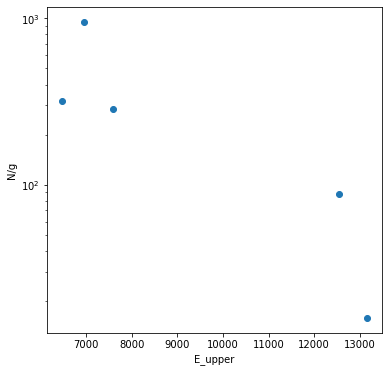

In [25]:
#excitation diagram
#extract excitation properties in center

Noverg_10_S2, Eu_10_S2 = calc_Noverg(H2_10_S2_flux_ctr, 'H2_10_S2')
Noverg_10_S1, Eu_10_S1 = calc_Noverg(H2_10_S1_flux_ctr, 'H2_10_S1')
Noverg_10_S0, Eu_10_S0 = calc_Noverg(H2_10_S0_flux_ctr, 'H2_10_S0')

Noverg_21_S1, Eu_21_S1 = calc_Noverg(H2_21_S1_flux_ctr, 'H2_21_S1')
Noverg_21_S2, Eu_21_S2 = calc_Noverg(H2_21_S2_flux_ctr, 'H2_21_S2')

fig = plt.figure(figsize=(6,6))
print(Noverg_10_S2)
level_pops = [Noverg_10_S2.value, Noverg_10_S1.value, Noverg_10_S0.value, Noverg_21_S1.value, Noverg_21_S2.value]
energy_lvls = [Eu_10_S2, Eu_10_S1, Eu_10_S0, Eu_21_S1, Eu_21_S2]

plt.plot(energy_lvls, level_pops, marker='o', linestyle='')
plt.semilogy()

plt.ylabel('N/g')

plt.xlabel('E_upper')

print(energy_lvls)

In [28]:
Mh2 = 5.0776e13 * H2_10_S1_flux_ctr * (D_L.value**2)

In [66]:
Mh2

NameError: name 'Mh2' is not defined

In [40]:
as_in_125pc

0.8358780816470168

In [27]:
print(np.nanmedian(H2_10_S1_flux))

8.70232963847424e-21


In [26]:
H2_10_S1_flux_ctr

2.4718551055753682e-17